# EDA

우선 전체적인 데이터에 대한 이해가 필요하다고 생각이 들었음


In [5]:
from datasets import load_from_disk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_dataset = load_from_disk("../data/train_dataset/")
test_dataset = load_from_disk("../data/test_dataset/")

wiki_data = pd.read_json("../data/wikipedia_documents.json").T

In [7]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})

In [8]:
test_dataset

DatasetDict({
    validation: Dataset({
        features: ['question', 'id'],
        num_rows: 600
    })
})

## 데이터의 기본적인 정보 확인


In [9]:
wiki_data.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [10]:
train_df = pd.DataFrame(train_dataset["train"])

train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3952 non-null   object
 1   context            3952 non-null   object
 2   question           3952 non-null   object
 3   id                 3952 non-null   object
 4   answers            3952 non-null   object
 5   document_id        3952 non-null   int64 
 6   __index_level_0__  3952 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 216.3+ KB


In [12]:
train_df.describe()

,document_id,__index_level_0__
count,3952.000000,3952.000000
mean,28399.783401,1496.027328
std,17475.051830,1060.480948
min,4572.000000,0.000000
25%,11615.750000,587.000000
50%,26295.000000,1189.500000
75%,44240.250000,2416.250000
max,60603.000000,3593.000000


In [13]:
valid_df = pd.DataFrame(train_dataset["validation"])

valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [14]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              240 non-null    object
 1   context            240 non-null    object
 2   question           240 non-null    object
 3   id                 240 non-null    object
 4   answers            240 non-null    object
 5   document_id        240 non-null    int64 
 6   __index_level_0__  240 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.3+ KB


In [15]:
valid_df.describe()

,document_id,__index_level_0__
count,240.000000,240.000000
mean,29027.704167,1572.008333
std,17915.733034,1049.535956
min,4866.000000,16.000000
25%,11726.250000,671.250000
50%,27485.000000,1372.000000
75%,44860.250000,2470.250000
max,60305.000000,3575.000000


## 결측치 확인


In [16]:
train_df.isnull().sum()

title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

In [17]:
valid_df.isnull().sum()

title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

## 중복된 값 확인

중복된 값이 몇개 정도 있는지 확인하는 과정


In [18]:
print(train_df["title"].nunique())
print(train_df["context"].nunique())
print(train_df["question"].nunique())

2716
3340
3952


In [19]:
print(valid_df["title"].nunique())
print(valid_df["context"].nunique())
print(valid_df["question"].nunique())

228
235
240


## 질문과 context의 길이 확인


In [20]:
train_df["question_length"] = train_df["question"].apply(len)
train_df["context_length"] = train_df["context"].apply(len)

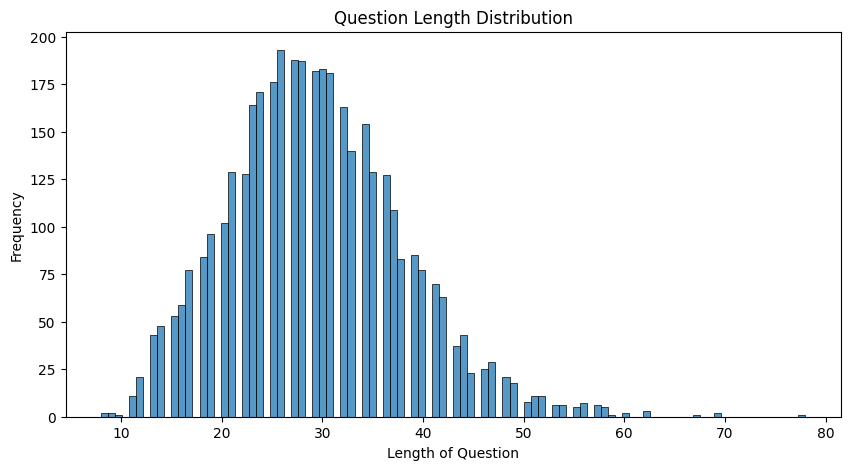

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["question_length"], bins=100)
plt.title("Question Length Distribution")
plt.xlabel("Length of Question")
plt.ylabel("Frequency")
plt.show()

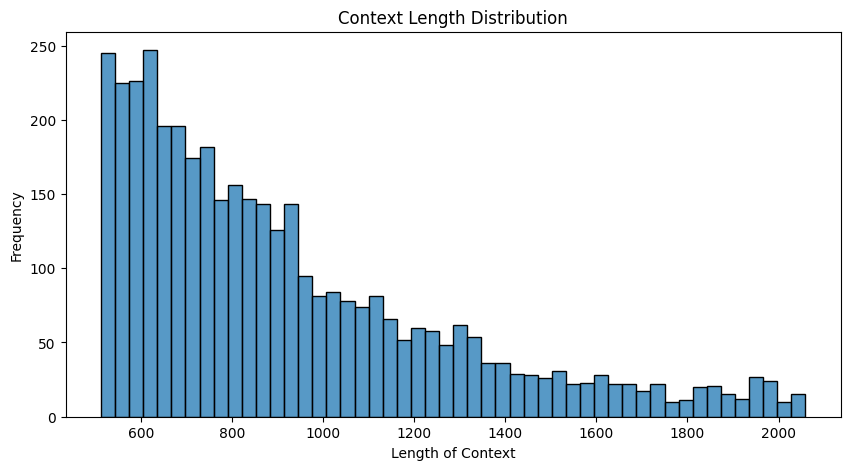

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["context_length"], bins=50)
plt.title("Context Length Distribution")
plt.xlabel("Length of Context")
plt.ylabel("Frequency")
plt.show()

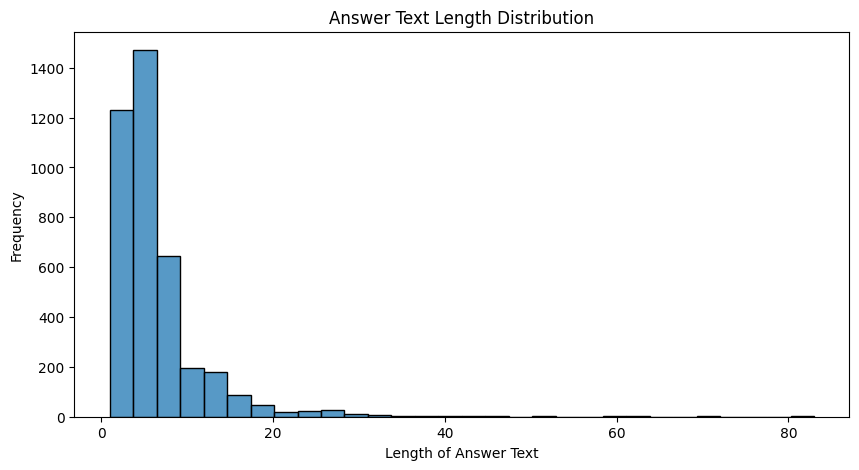

In [23]:
train_df["answer_text_length"] = train_df["answers"].apply(lambda x: len(x["text"][0]))

plt.figure(figsize=(10, 5))
sns.histplot(train_df["answer_text_length"], bins=30)
plt.title("Answer Text Length Distribution")
plt.xlabel("Length of Answer Text")
plt.ylabel("Frequency")
plt.show()

## 불용어


In [24]:
from konlpy.tag import Okt


stopwords = """
ㄱ ㄴ ㄷ ㄹ ㅁ ㅂ ㅅ ㅇ ㅈ ㅊ ㅋ ㅌ ㅍ ㅎ ; ! ? - _ ~
""".split()

okt = Okt()

train_df["stopword_count"] = train_df["context"].apply(
    lambda x: sum(1 for token in okt.morphs(x) if token in stopwords)
)
valid_df["stopword_count"] = valid_df["context"].apply(
    lambda x: sum(1 for token in okt.morphs(x) if token in stopwords)
)
wiki_data["stopword_count"] = wiki_data["text"].apply(
    lambda x: sum(1 for token in okt.morphs(x) if token in stopwords)
)

In [25]:
train_df["stopword_count"].describe()

count    3952.000000
mean        8.714069
std         6.059832
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        47.000000
Name: stopword_count, dtype: float64

In [26]:
valid_df["stopword_count"].describe()

count    240.000000
mean       8.679167
std        6.145480
min        0.000000
25%        5.000000
50%        7.000000
75%       11.000000
max       33.000000
Name: stopword_count, dtype: float64

In [27]:
wiki_data["stopword_count"].describe()

count    60613.000000
mean         9.140250
std         15.844889
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1153.000000
Name: stopword_count, dtype: float64

## GPT로 라벨 붙이기

답변 유형
질문 유형


In [3]:
from datasets import load_from_disk
import pandas as pd


train_dataset = load_from_disk("../data/train_dataset/")

test_dataset = load_from_disk("../data/test_dataset/")

In [4]:
train_df = pd.DataFrame(train_dataset["train"])
valid_df = pd.DataFrame(train_dataset["validation"])

In [94]:
valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [91]:
context = train_df["context"][500]

print(context)

프리츠 게를리히는 민족주의자인 동시에 반(反) 나치주의자로서 그는 당시 신문사에서 기자일을 하고 있었다. 히틀러를 만나기 이전까지는 히틀러에 대해 매우 호의적으로 표현했는데 같은 민족주의 성향에서는 당연히 히틀러를 호의적으로 언급했던 것이다. 하지만 히틀러와의 면담 후에 히틀러의 정신적인 과대망상에 문제를 느끼고 그 이후부터 반나치 활동을 시작하였다.\n\n히틀러를 여러 번 비판했기 때문에 친(親) 나치 성향이었던 신문사 사장으로부터 해고당한다. 1932년 신문 《올바른 길(Der gerade Weg)》을 창간했으며 주로 히틀러와 나치당을 비판하는 기사를 썼다. 히틀러는 뮌헨 폭동 당시 그가 자신의 정신적인 문제를 고발했었기 때문에 그저 '그를 막아라'라는 짧은 말만 남기고 대수롭지 않게 여겼다.\n\n그러나 《올바른 길》에서 히틀러의 유전적 우월성에 대한 이론을 비판하였는데 "히틀러의 인종적 분류에 따르면 히틀러의 코는 훈족인 아틸라의 코와 흡사하다."는 내용의 기사를 남겨 히틀러에게 큰 화를 불러 일으켰다. 한편 에른스트 룀의 부관이었던 게오르크 벨(Georg Bell)은 그의 신문사를 방문한 뒤 에른스트 룀의 석유 전매권과 무력 시위에 관한 모든 사실을 제보하였다. 게를리히는 이 내용을 신문사에 싣게 되는데 히틀러는 그제서야 이 문제점을 깨닫고 게를리히를 잡아들이기에 이른다. 결국 게를리히는 장검의 밤 사건에 연루되어 체포되었고 1934년 다하우 강제 수용소에서 죽음을 맞게 된다.


In [133]:
question = train_df["question"][555]

print(question)

1646년 요절한 인물의 부친은?


In [134]:
answer = train_df["answers"][555]["text"]

print(answer)

['펠리페 4세']


In [5]:
test_df = valid_df[40:140]

test_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
40,얀 스뮈츠,스뮈츠는 1870년 5월 24일 케이프 식민지 보펀플라츠에 있는 한 농가에서 태어났...,스뮈츠에게 학비를 지원해 준 사람은?,mrc-0-001870,"{'answer_start': [1036], 'text': ['마리즈 교수']}",31510,1228
41,브루투스 (트로이아),몬머스의 제프리의 《브리타니아 열왕사》에 나오는 브루투스 이야기는 《브리튼인의 역사...,브루투스가 세운도시의 현재 이름은?,mrc-1-000753,"{'answer_start': [1424], 'text': ['런던']}",44222,485
42,대학 입시 센터 시험,대학 입시 센터 시험(다이가쿠뉴시센타시켄)은 독립 행정법인 대학 입시 센터에서 보통...,일본의 대학 입시는 며칠간 진행되는가?,mrc-0-001073,"{'answer_start': [71], 'text': ['이틀']}",33640,709
43,영주 부석사 조사당 벽화,이 벽화는 부석사를 창건하고 우리나라에서 화엄종을 처음 시작한 의상대사를 모시고 있...,국내 화엄종의 선구자는 누구인가?,mrc-1-001116,"{'answer_start': [35], 'text': ['의상대사']}",34140,732
44,가키자키씨,지금의 가키자키 씨의 시조는 와카사 다케다 씨(若狭武田氏) 또는 난부 씨(南部氏)의...,다케다 노부히로가 통치한 지역은 어디인가?,mrc-1-000995,"{'answer_start': [135], 'text': ['홋카이도']}",18605,645


In [126]:
train_df[["question", "answers"]].to_csv("./train_df_qa.csv", index=False)
valid_df[["question", "answers"]].to_csv("./valid_df_qa.csv", index=False)

In [138]:
# 답변 유형 분석

from openai import OpenAI
from tqdm import tqdm


client = OpenAI(api_key="[API Key]")


def get_answer_label(question, answer):

    client = OpenAI(api_key="[API Key]")

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": """When a ‘question’ and its corresponding ‘answer’ are given, print the type of ‘answer’ in a short form.
                The types are divided into ‘인물’ (person), ‘국가’ (country), ‘장소’ (place), ‘시간’ (time), ‘방법’ (method), ‘문학’ (literature), ‘계산’ (calculation). If the type does not belong to any of these, categorize it as ‘기타’ (other).
                The output format should be: Type: [].
                For example, if the ‘question’ is ‘카예스 대통령에 대한 가톨릭 교회의 저항은 몇 년에 일어났는가?’ and the ‘answer’ is ‘1927년’, the output should be Type: [시간].
                Please keep the type output in Korean.""",
            },
            {
                "role": "user",
                "content": f"question: {question}, answer: {answer}",
            },
        ],
        max_tokens=10,  # 짧은 응답을 유도하기 위해 제한
        temperature=0,
    )

    try:
        output = response.choices[0].message.content.strip()
        # '유형: ' 이후의 텍스트만 추출
        if output.startswith("Type:"):
            answer_type = output.split("Type:")[1].strip()
            return answer_type
        else:
            return "기타"  # 형식이 맞지 않을 경우 '기타'로 분류
    except Exception as e:
        print(f"Error processing row: {e}")
        return "기타"


def process_data_with_chatgpt(df):
    # tqdm을 사용해 진행 상황 표시
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
        question = row["question"]
        answer = row["answers"]["text"]  # 기존 'answers' 필드에서 첫 번째 답변 추출

        # ChatGPT로부터 답변 유형 받아오기
        answer_type = get_answer_label(question, answer)

        # 'answer_label' 컬럼에 저장
        df.at[idx, "answer_label"] = answer_type

    return df


answer_label_train_df = process_data_with_chatgpt(train_df)

answer_label_train_df.to_csv("./answer_label_train_df.csv", index=False)

answer_label_valid_df = process_data_with_chatgpt(valid_df)

answer_label_valid_df.to_csv("./answer_label_valid_df.csv", index=False)

Processing rows: 100%|██████████| 240/240 [04:38<00:00,  1.16s/it]


In [139]:
# 답변 유형 분석 (수정)

from openai import OpenAI
from tqdm import tqdm


client = OpenAI(api_key="[API Key]")


def get_answer_label(question, answer):

    client = OpenAI(api_key="[API Key]")

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": """When a ‘question’ and its corresponding ‘answer’ are given, print the type of ‘answer’ in a short form.
                The types are divided into '대상' (what) ‘인물’ (who), ‘장소’ (where), ‘시간’ (when), ‘방법’ (how), ‘원인’ (why). If the type does not belong to any of these, categorize it as ‘기타’ (other).
                The output format should be: Type: [].
                For example, if the ‘question’ is ‘카예스 대통령에 대한 가톨릭 교회의 저항은 몇 년에 일어났는가?’ and the ‘answer’ is ‘1927년’, the output should be Type: [시간].
                Please keep the type output in Korean.""",
            },
            {
                "role": "user",
                "content": f"question: {question}, answer: {answer}",
            },
        ],
        max_tokens=10,  # 짧은 응답을 유도하기 위해 제한
        temperature=0,
    )

    try:
        output = response.choices[0].message.content.strip()
        # '유형: ' 이후의 텍스트만 추출
        if output.startswith("Type:"):
            answer_type = output.split("Type:")[1].strip()
            return answer_type
        else:
            return "기타"  # 형식이 맞지 않을 경우 '기타'로 분류
    except Exception as e:
        print(f"Error processing row: {e}")
        return "기타"


def process_data_with_chatgpt(df):
    # tqdm을 사용해 진행 상황 표시
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
        question = row["question"]
        answer = row["answers"]["text"]  # 기존 'answers' 필드에서 첫 번째 답변 추출

        # ChatGPT로부터 답변 유형 받아오기
        answer_type = get_answer_label(question, answer)

        # 'answer_label' 컬럼에 저장
        df.at[idx, "answer_label"] = answer_type

    return df


answer_label_train_df = process_data_with_chatgpt(train_df)

answer_label_train_df.to_csv("./answer_label_train_df.csv", index=False)

answer_label_valid_df = process_data_with_chatgpt(valid_df)

answer_label_valid_df.to_csv("./answer_label_valid_df.csv", index=False)

Processing rows: 100%|██████████| 240/240 [05:29<00:00,  1.37s/it]


In [25]:
# 질문 유형 분석

from openai import OpenAI
from tqdm import tqdm


def get_answer_label(question, answer, context):

    client = OpenAI(api_key="[API Key]")

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": """‘question’ and the ‘answer’ corresponding to the ‘question’, along with the ‘context’ document that serves as the basis for deriving the ‘answer’ from the ‘question’, are given. Classify how the ‘question’ was created using the ‘context’. The classification types are as follows:
                If the ‘question’ is created by altering a phrase from the ‘context’, classify it as ‘구문 변형’.
                If the ‘question’ is created by replacing words in the ‘context’ sentences with synonyms, classify it as ‘유의어’.
                If the ‘question’ is created by substituting a part of the ‘context’ sentences with general knowledge, classify it as ‘일반 상식’.
                If the ‘question’ is based on multiple sentences from the ‘context’, classify it as ‘문장 근거 활용’.
                If the ‘question’ requires logical reasoning based on the information from the ‘context’, classify it as ‘논리적 추론’.
                Any type that does not fit into these five categories should be classified as ‘기타’.
                The output format should be 'Type: []'. The types should be output in Korean.""",
            },
            {
                "role": "user",
                "content": f"question: {question}, answer: {answer}, context: {context}",
            },
        ],
        max_tokens=10,  # 짧은 응답을 유도하기 위해 제한
        temperature=0,
    )

    try:
        output = response.choices[0].message.content.strip()
        # '유형: ' 이후의 텍스트만 추출
        if output.startswith("Type:"):
            answer_type = output.split("Type:")[1].strip()
            return answer_type
        else:
            return "기타"  # 형식이 맞지 않을 경우 '기타'로 분류
    except Exception as e:
        print(f"Error processing row: {e}")
        return "기타"


def process_data_with_chatgpt(df):
    # tqdm을 사용해 진행 상황 표시
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
        question = row["question"]
        answer = row["answers"]["text"]
        context = row["context"]  # 기존 'answers' 필드에서 첫 번째 답변 추출

        # ChatGPT로부터 답변 유형 받아오기
        answer_type = get_answer_label(question, answer, context)

        # 'answer_label' 컬럼에 저장
        df.at[idx, "question_label"] = answer_type

    return df


question_label_train_df = process_data_with_chatgpt(train_df)

question_label_train_df.to_csv("./question_label_train_df.csv", index=False)

question_label_valid_df = process_data_with_chatgpt(valid_df)

question_label_valid_df.to_csv("./question_label_valid_df.csv", index=False)

Processing rows: 100%|██████████| 240/240 [05:27<00:00,  1.37s/it]


In [15]:
# 정답 유형 EDA
train_dataset = pd.read_csv("./answer_label_train_df.csv")
valid_dataset = pd.read_csv("./answer_label_valid_df.csv")

In [16]:
train_dataset.head()

,title,context,question,id,answers,document_id,__index_level_0__,answer_label
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,[기타].
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,[기타].
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,[대상].
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,[장소].
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,[기타].


In [19]:
train_dataset["answer_label"] = train_dataset["answer_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)
valid_dataset["answer_label"] = valid_dataset["answer_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)

print(train_dataset.head())
print(valid_dataset.head())

     title                                            context  \
0    미국 상원  미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...   
1   인사조직관리  '근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...   
2      강희제  강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...   
3   금동삼존불감  불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...   
4  계사명 사리구  동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...   

                                  question            id  \
0         대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?  mrc-1-000067   
1                   현대적 인사조직관리의 시발점이 된 책은?  mrc-0-004397   
2           강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?  mrc-1-000362   
3  11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?  mrc-0-001510   
4               명문이 적힌 유물을 구성하는 그릇의 총 개수는?  mrc-0-000823   

                                         answers  document_id  \
0        {'answer_start': [235], 'text': ['하원']}        18293   
1  {'answer_start': [212], 'text': ['《경영의 실제》']}        51638   
2        {'answer_start': [510], 'text': ['백성']}     

In [20]:
train_value_counts = train_dataset["answer_label"].value_counts()
valid_value_counts = valid_dataset["answer_label"].value_counts()

trian_missing_values = train_dataset["answer_label"].isnull().sum()
valid_missing_values = valid_dataset["answer_label"].isnull().sum()

print(train_value_counts)
print(valid_value_counts)

print(trian_missing_values)
print(valid_missing_values)

answer_label
인물    1039
기타     983
대상     700
장소     534
시간     484
원인     110
방법     102
Name: count, dtype: int64
answer_label
기타    68
인물    48
대상    46
장소    39
시간    25
방법     7
원인     7
Name: count, dtype: int64
0
0


In [23]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

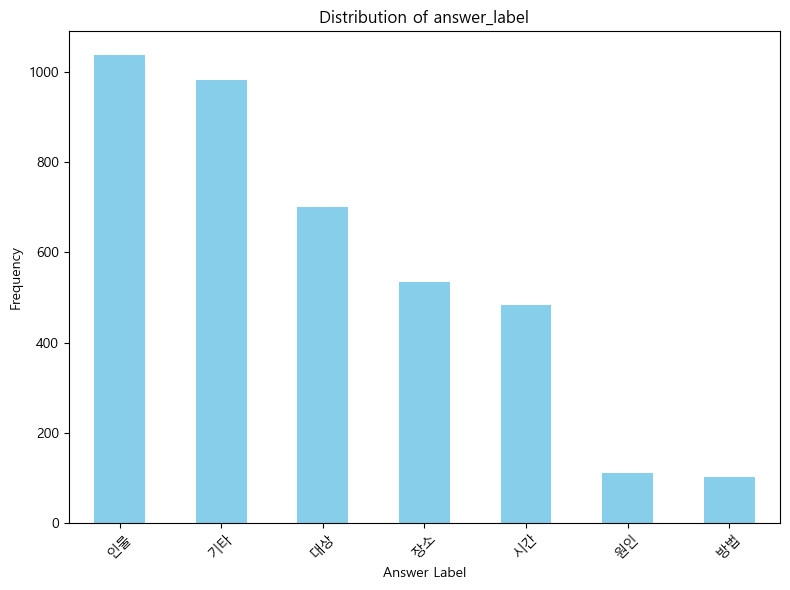

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
train_value_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of answer_label")
plt.xlabel("Answer Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
train_dataset = pd.read_csv("./question_label_train_df.csv")
valid_dataset = pd.read_csv("./question_label_valid_df.csv")

In [28]:
train_dataset["question_label"] = train_dataset["question_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)
valid_dataset["question_label"] = valid_dataset["question_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)

In [29]:
train_value_counts = train_dataset["question_label"].value_counts()
valid_value_counts = valid_dataset["question_label"].value_counts()

trian_missing_values = train_dataset["question_label"].isnull().sum()
valid_missing_values = valid_dataset["question_label"].isnull().sum()

print(train_value_counts)
print(valid_value_counts)

print(trian_missing_values)
print(valid_missing_values)

question_label
문장 근거 활용    2272
구문 변형        773
일반 상식        395
기타           341
논리적 추론       159
유의어           11
무성 생식          1
Name: count, dtype: int64
question_label
문장 근거 활용    144
구문 변형        38
기타           31
일반 상식        16
논리적 추론       10
유의어           1
Name: count, dtype: int64
0
0


In [37]:
print(train_dataset[train_dataset["question_label"] == "무성 생식"])

     title                                            context  \
2115   남세균  원핵식물로 조류에 속하는 이들은 거의가 단세포, 군체 및 실 모양인 다세포체를 이룬...   

                              question            id  \
2115  광합성으로 남조녹말을 저장하는 조류는 어떤 생식을 하나요?  mrc-1-001363   

                                        answers  document_id  \
2115  {'answer_start': [68], 'text': ['무성 생식']}         7582   

      __index_level_0__ question_label  
2115                889          무성 생식  


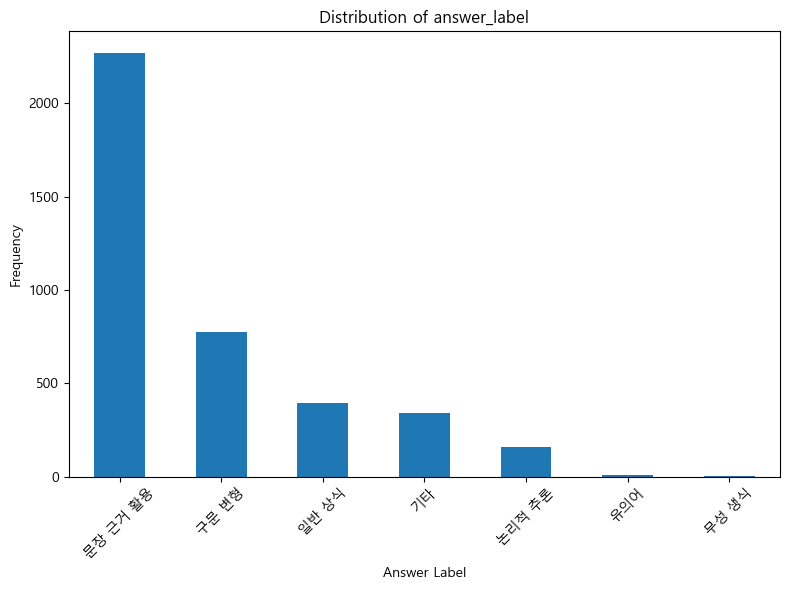

In [31]:
plt.figure(figsize=(8, 6))
train_value_counts.plot(kind="bar")
plt.title("Distribution of answer_label")
plt.xlabel("Answer Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

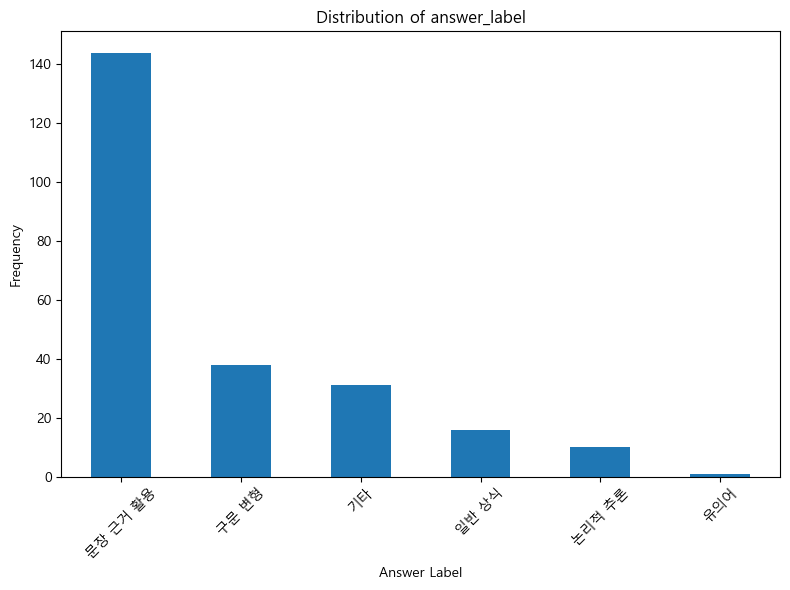

In [33]:
plt.figure(figsize=(8, 6))
valid_value_counts.plot(kind="bar")
plt.title("Distribution of answer_label")
plt.xlabel("Answer Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [2]:
import pandas as pd

answer_train_df = pd.read_csv("./answer_label_train_df.csv")
answer_valid_df = pd.read_csv("./answer_label_valid_df.csv")

question_train_df = pd.read_csv("./question_label_train_df.csv")
question_valid_df = pd.read_csv("./question_label_valid_df.csv")

In [3]:
answer_train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,answer_label
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,[기타].
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,[기타].
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,[대상].
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,[장소].
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,[기타].


In [4]:
question_train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,question_label
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,[문장 근거 활용]
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,[문장 근거 활용]
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,[문장 근거 활용]
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,[일반 상식]
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,[문장 근거 활용]


In [5]:
train_merged_data = pd.merge(
    answer_train_df, question_train_df[["id", "question_label"]], on="id", how="inner"
)
valid_merged_data = pd.merge(
    answer_valid_df, question_valid_df[["id", "question_label"]], on="id", how="inner"
)

train_merged_data["answer_label"] = train_merged_data["answer_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)
valid_merged_data["answer_label"] = valid_merged_data["answer_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)

train_merged_data["question_label"] = train_merged_data["question_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)
valid_merged_data["question_label"] = valid_merged_data["question_label"].str.replace(
    r"[\[\]\.]+", "", regex=True
)

In [6]:
train_merged_data.head()

,title,context,question,id,answers,document_id,__index_level_0__,answer_label,question_label
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,기타,문장 근거 활용
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,기타,문장 근거 활용
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,대상,문장 근거 활용
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,장소,일반 상식
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,기타,문장 근거 활용


In [7]:
valid_merged_data.head()

,title,context,question,id,answers,document_id,__index_level_0__,answer_label,question_label
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146,대상,문장 근거 활용
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106,시간,문장 근거 활용
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180,기타,문장 근거 활용
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141,방법,문장 근거 활용
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184,대상,문장 근거 활용


In [9]:
train_merged_data.to_json(
    "train_dataset_label.json", orient="records", force_ascii=False, indent=4
)
valid_merged_data.to_json(
    "valid_dataset_label.json", orient="records", force_ascii=False, indent=4
)

## LLaMa를 사용한 버전

생각보다 성능이 좋지 않아 포기


In [5]:
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python
!huggingface-cli download MLP-KTLim/llama-3-Korean-Bllossom-8B-gguf-Q4_K_M --local-dir=C:/Users/Yohan/Desktop/naverboostcamp_prj/ODQA/level2-mrc-nlp-14/Notebooks/model

'CMAKE_ARGS'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model



Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]Downloading '.gitattributes' to 'C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model\.cache\huggingface\download\.gitattributes.4eba1088cbec5eae276a6990930ab6a5136103d1.incomplete'
Download complete. Moving file to C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model\.gitattributes

Fetching 6 files:  17%|█▋        | 1/6 [00:00<00:02,  2.43it/s]Downloading 'llama-3-Korean-Bllossom-8B-Q4_K_M.gguf' to 'C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model\.cache\huggingface\download\llama-3-Korean-Bllossom-8B-Q4_K_M.gguf.36edb3ca5dfd7dd1cc7ea3ee440a461befa79efb5b2cbe6aa1304b3dbc34f39c.incomplete'
Download complete. Moving file to C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model\special_tokens_map.json
Download complete. Moving file to C:\Users\Yohan\Desktop\naverboostcamp_prj\ODQA\level2-mrc-nlp-14\Notebooks\model\toke

In [46]:
from transformers import LlamaTokenizer, LlamaForCausalLM
from tqdm import tqdm
import torch
from llama_cpp import Llama
from transformers import AutoTokenizer

model_id = "MLP-KTLim/llama-3-Korean-Bllossom-8B-gguf-Q4_K_M"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = Llama(
    model_path="./model/llama-3-Korean-Bllossom-8B-Q4_K_M.gguf",
    n_ctx=1024,
    n_gpu_layers=-1,  # Number of model layers to offload to GPU
)

PROMPT = """내가 질문이랑 답변을 주면 해당 질문이 어떤 유형의 답변을 원하는지 단답으로 출력해줘
예를들면 질문이 'BBC의 파란 경찰 박스 디자인 상표권에 대한 법적 논란이 종료된 해는?' 이거라면 답이 '2002' 이거일때 해당 답변 유형은 시간이라고 할 수 있어 이것처럼 부탁해"""

instruction = f"question: {question}, answer: {answer}"

messages = [
    {"role": "system", "content": f"{PROMPT}"},
    {"role": "user", "content": f"{instruction}"},
]

prompt = tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

total_tokens = len(tokenizer(prompt)["input_ids"])

generation_kwargs = {
    "max_tokens": 512,
    "stop": ["<|eot_id|>"],
    "top_p": 0.9,
    "temperature": 0.6,
    "echo": True,  # Echo the prompt in the output
}

resonse_msg = model(prompt, **generation_kwargs)
print(resonse_msg["choices"][0]["text"][len(prompt) :])

llama_model_loader: loaded meta data with 30 key-value pairs and 291 tensors from ./model/llama-3-Korean-Bllossom-8B-Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = llama-3-Korean-Bllossom-8B
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.attention.head_count u32              = 32
llama_model_loader: - kv   7:              llam

이 질문과 답변은 역사적 사건이나 인물의 설립 날짜에 관한 질문입니다.
